In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

## Heart Disease ML Project

1.Problem Definition
2.Data
3.Evaluation
4.Features
5.Modelling
6.Experimentation

Given the clinical Parameters of a Patient, we are going to predict whether he/she has heart disease or not

Meaning of each Feature

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


Load the Data

In [5]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
df.shape

(1025, 14)

Data Exploration

In [7]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target'>

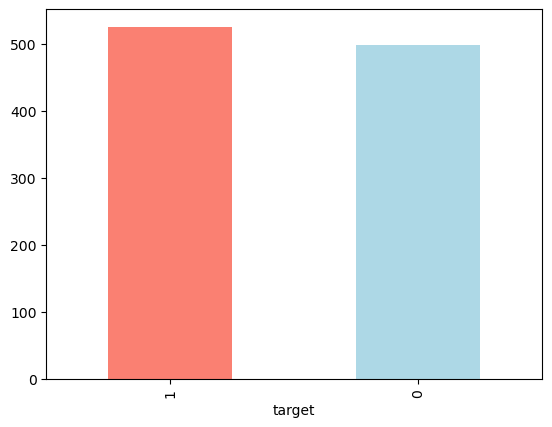

In [8]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.isna().value_counts()

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   target
False  False  False  False     False  False  False    False    False  False    False  False  False  False     1025
Name: count, dtype: int64

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [14]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

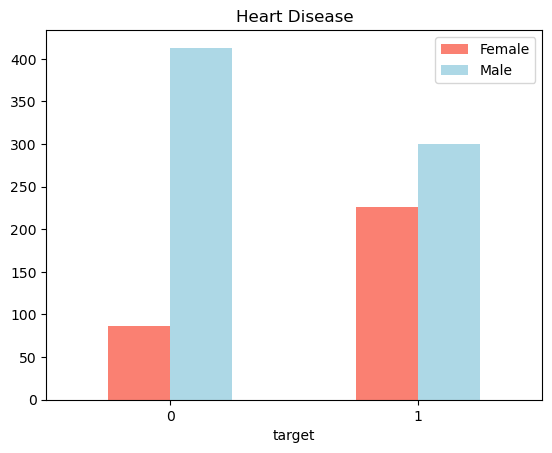

In [15]:
pd.crosstab(df.target,df.sex).plot(kind='bar',color=['salmon','lightblue']) 
plt.title("Heart Disease")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0)

In [16]:
df['thalach'].value_counts()

thalach
162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: count, Length: 91, dtype: int64

creating age vs max-heart rate

Text(0, 0.5, 'Max Heart Rate')

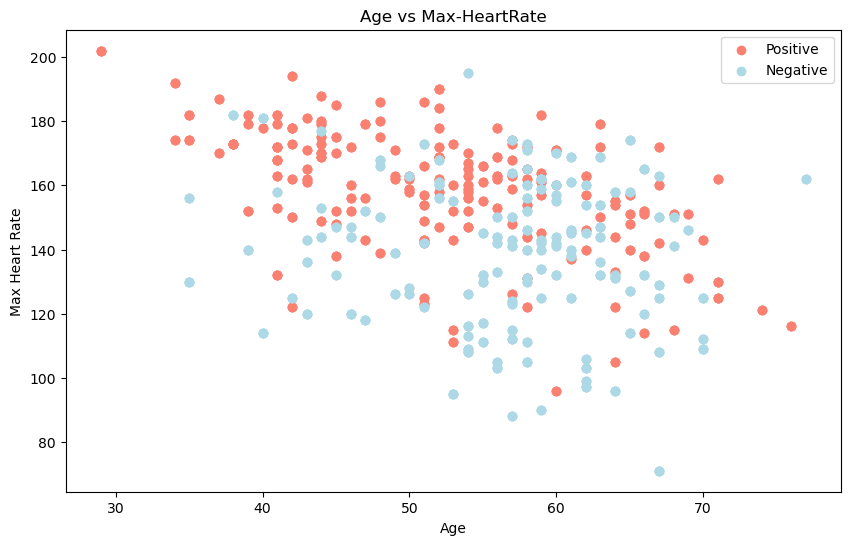

In [17]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon')

plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue');

plt.legend(['Positive','Negative'])

plt.title('Age vs Max-HeartRate')

plt.xlabel('Age')
plt.ylabel('Max Heart Rate')

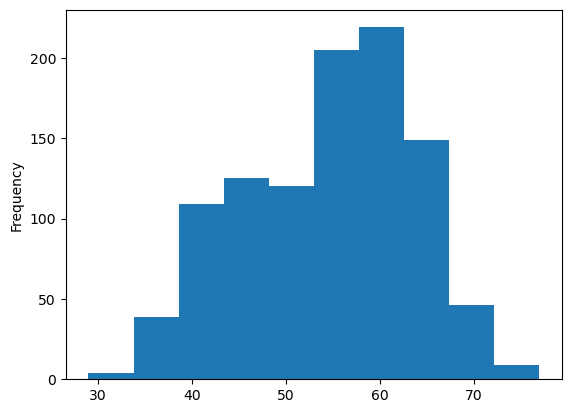

In [18]:
df.age.plot.hist();

In [19]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


Text(0.5, 1.0, 'Chest Pain Type vs Heart Disease')

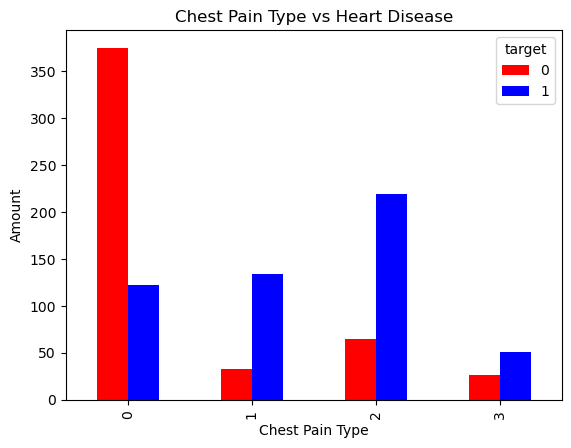

In [20]:
pd.crosstab(df.cp,df.target).plot(kind='bar',color=['red','blue'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.title("Chest Pain Type vs Heart Disease")

Correlation Matrix tells us how each feature is related to one another

In [21]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


(14.5, -0.5)

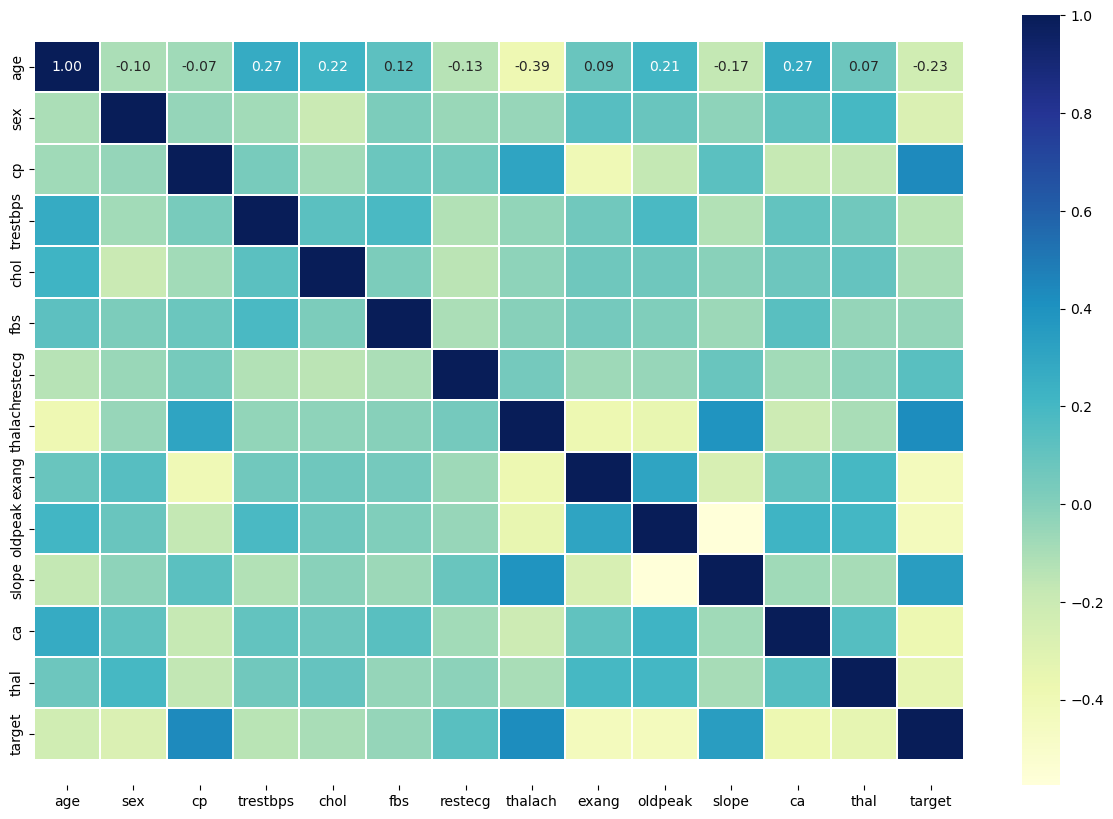

In [22]:
corr_matrix = df.corr()
fog,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
                annot=True,
                linewidths='0.2',
                fmt='.2f',
                cmap='YlGnBu')
btm,top=ax.get_ylim()
ax.set_ylim(btm + 0.5,top-0.5)

Modelling

In [23]:
x = df.drop('target',axis=1)

In [24]:
y=df['target']

In [25]:
print(x,y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [26]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


we will try 3 ml models
1.Logistic Regression
2.K-nearest-Neighbours
3.RandomForestClassifier

Put Models in a Dictionary

In [34]:
models={"Logistic Regression":LogisticRegression(solver='liblinear', max_iter=1000),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}
## function to fit and score models

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [35]:
model_scores=fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

<Axes: >

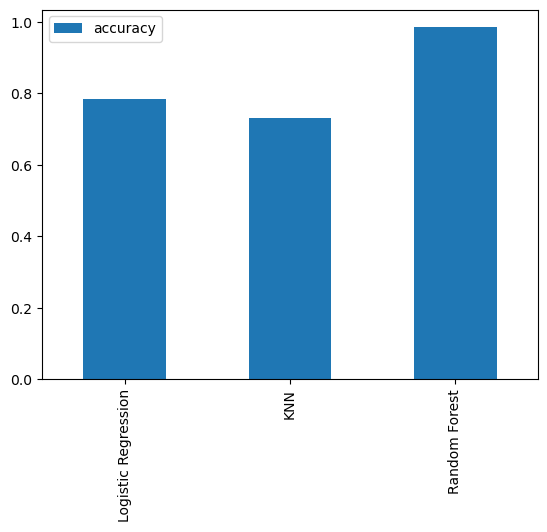

In [36]:
## Model Comparison
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()

## Hyperparameter Tuning
## Feature Importance
## Confusion Matrix
## Cross-Validation
## Precision
## Recall
## F1 Score
## Classification Report
## ROC Curve
## AUC

In [37]:
## Tuning KNN
train_scores=[]
test_scores=[]

neighbors=np.arange(21)
neighbors=neighbors[2:]

knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test)) 

In [38]:
train_scores

[0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

In [39]:
test_scores

[0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

0.9560975609756097 0.9963414634146341


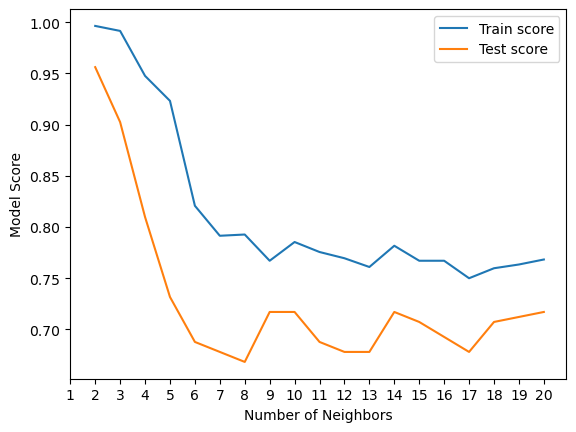

In [40]:
plt.plot(neighbors,train_scores,label='Train score')
plt.plot(neighbors,test_scores,label='Test score')
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend();
plt.xticks(np.arange(1,21,1))
print(max(test_scores),max(train_scores))

 hyper parameter tuning with randomized search cv

 we are going to tune
1. Logistic Regression
2. Random Forest Classifier

In [41]:
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":['liblinear']}

rf_grid = {'n_estimators':np.arange(10,1000,50),
            'max_depth':[None,3,5,10],
            'min_samples_split':np.arange(2,20,2),
            'min_samples_leaf':np.arange(1,20,2)}

we will use randomizedsearchCV for the abv two grids

In [42]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [44]:
rs_log_reg.score(x_test,y_test)

0.7853658536585366

In [45]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [46]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [47]:
rs_rf.score(x_test,y_test)

0.926829268292683

using GridSearchCV

In [48]:
log_reg_grid={"C":np.logspace(-4,4,30),
                'solver':['liblinear']}
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [49]:
gs_log_reg.score(x_test,y_test)

0.7853658536585366

In [50]:
y_preds=gs_log_reg.predict(x_test)

In [51]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

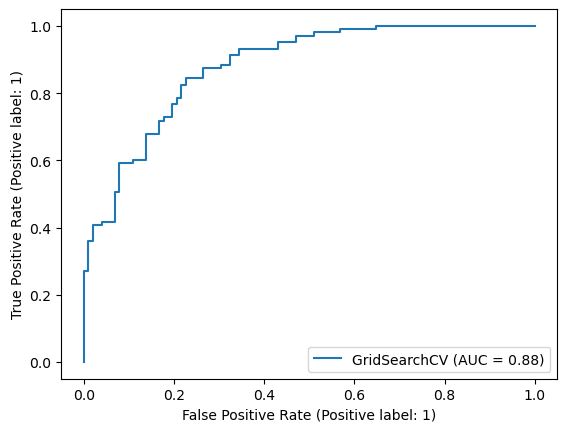

In [52]:
from sklearn.metrics import RocCurveDisplay

# Assuming you already have the classifier and the test data
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)


In [53]:
print(confusion_matrix(y_test,y_preds))

[[71 31]
 [13 90]]


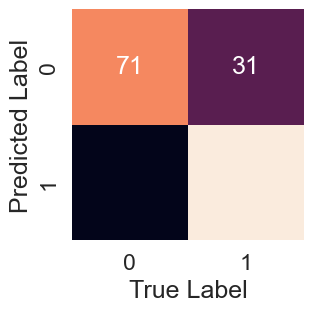

In [54]:
sns.set(font_scale=1.5)

def conf_mat(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax= sns.heatmap( confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
conf_mat(y_test,y_preds)
    

In [55]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



two ways to save and load a machine learning model

1. Python's Pickle Module
2. Joblib Module

In [56]:
import pickle
pickle.dump(gs_log_reg,open("gs_log_regression.pkl",'wb'))

In [57]:
loaded_pickle_model=pickle.load(open("gs_log_regression.pkl",'rb'))

In [58]:
pickle_y_preds = loaded_pickle_model.predict(x_test)

In [59]:
from joblib import dump,load

dump(gs_log_reg,filename="gs_log_regression.joblib" )

['gs_log_regression.joblib']

In [60]:
loaded_joblib_model = load(filename="gs_log_regression.joblib")

In [61]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [62]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [63]:
cv_acc=cross_val_score(clf,
                       x,y,cv=5,scoring='accuracy')
cv_acc

array([0.87804878, 0.84878049, 0.88292683, 0.8195122 , 0.8       ])

In [64]:
cv_acc.mean()

0.8458536585365855

In [65]:
cv_precision=cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_precision

array([0.84482759, 0.81355932, 0.84615385, 0.78813559, 0.77777778])

In [66]:
cv_precision.mean()

0.8140908250785517

In [67]:
cv_recall=cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_recall

array([0.93333333, 0.91428571, 0.94285714, 0.88571429, 0.85849057])

In [68]:
cv_recall.mean()

0.9069362084456424

In [69]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1

array([0.88687783, 0.86098655, 0.89189189, 0.83408072, 0.8161435 ])

In [70]:
cv_f1.mean()

0.8579960964556059

In [71]:
cv_metrics=pd.DataFrame({'Accuracy':cv_acc.mean(),
                          "Precision":cv_precision.mean(),
                          "Recall":cv_recall.mean(),
                          "F1":cv_f1.mean()      },index=[0])

In [72]:
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.845854,0.814091,0.906936,0.857996


<Axes: >

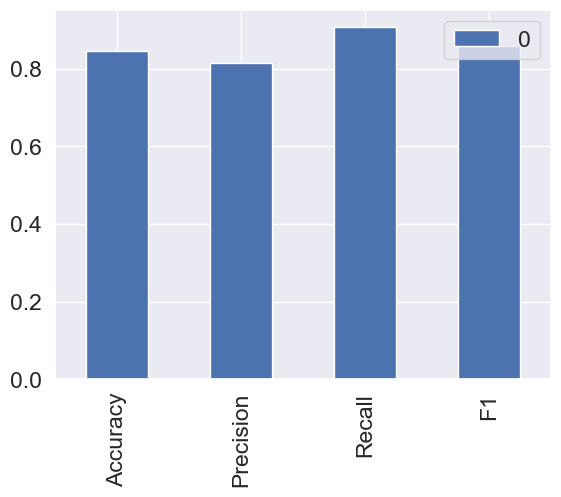

In [73]:
cv_metrics.T.plot.bar()

In [74]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [75]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [76]:
clf.coef_
# this abv tells us how each ind variable of the data se contributes to the target variable

array([[ 0.01575069, -1.26513693,  0.77534808, -0.01372167, -0.00699639,
        -0.14437774,  0.28403633,  0.03492716, -0.64220201, -0.62257017,
         0.46428666, -0.75326485, -0.91923679]])

In [77]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.01575068870073275,
 'sex': -1.2651369335425624,
 'cp': 0.7753480847534814,
 'trestbps': -0.013721666973975895,
 'chol': -0.0069963873987951815,
 'fbs': -0.14437773940583534,
 'restecg': 0.28403632695919306,
 'thalach': 0.03492716424710191,
 'exang': -0.6422020055328294,
 'oldpeak': -0.6225701738208844,
 'slope': 0.4642866585650597,
 'ca': -0.7532648479438995,
 'thal': -0.9192367905746829}

<Axes: >

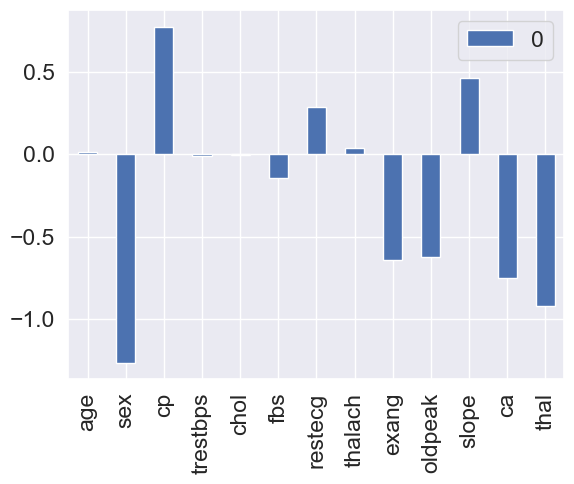

In [78]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar()